In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

## Unit balls

Recall that a unit $\alpha$-ball in 2 dimensions, centered in $(x_0, y_0)$ is given by

$$(x-x_0)^\alpha + (y-y_0)^\alpha = 1$$

Setting $x_0=1, y_0=0$ and taking the positive square root, we could eg use this curve to approximate ROC curves:

In [30]:
x = np.linspace(0,1,100)

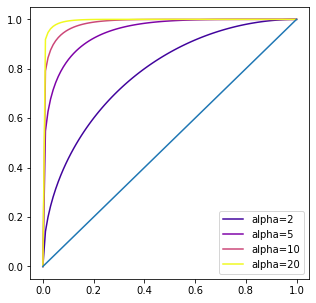

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
for alpha in [2,5,10,20]:
    y = (1-(1-x)**alpha)**(1/alpha)
    plt.plot(x, y,label=f"{alpha=}", color=cm.plasma(alpha/20))
plt.legend()
plt.plot([0,1])
plt.show()

## Lift curves

A lift curve is the cumulative delinquency curve. We want to use a similar metric to assess how good it is

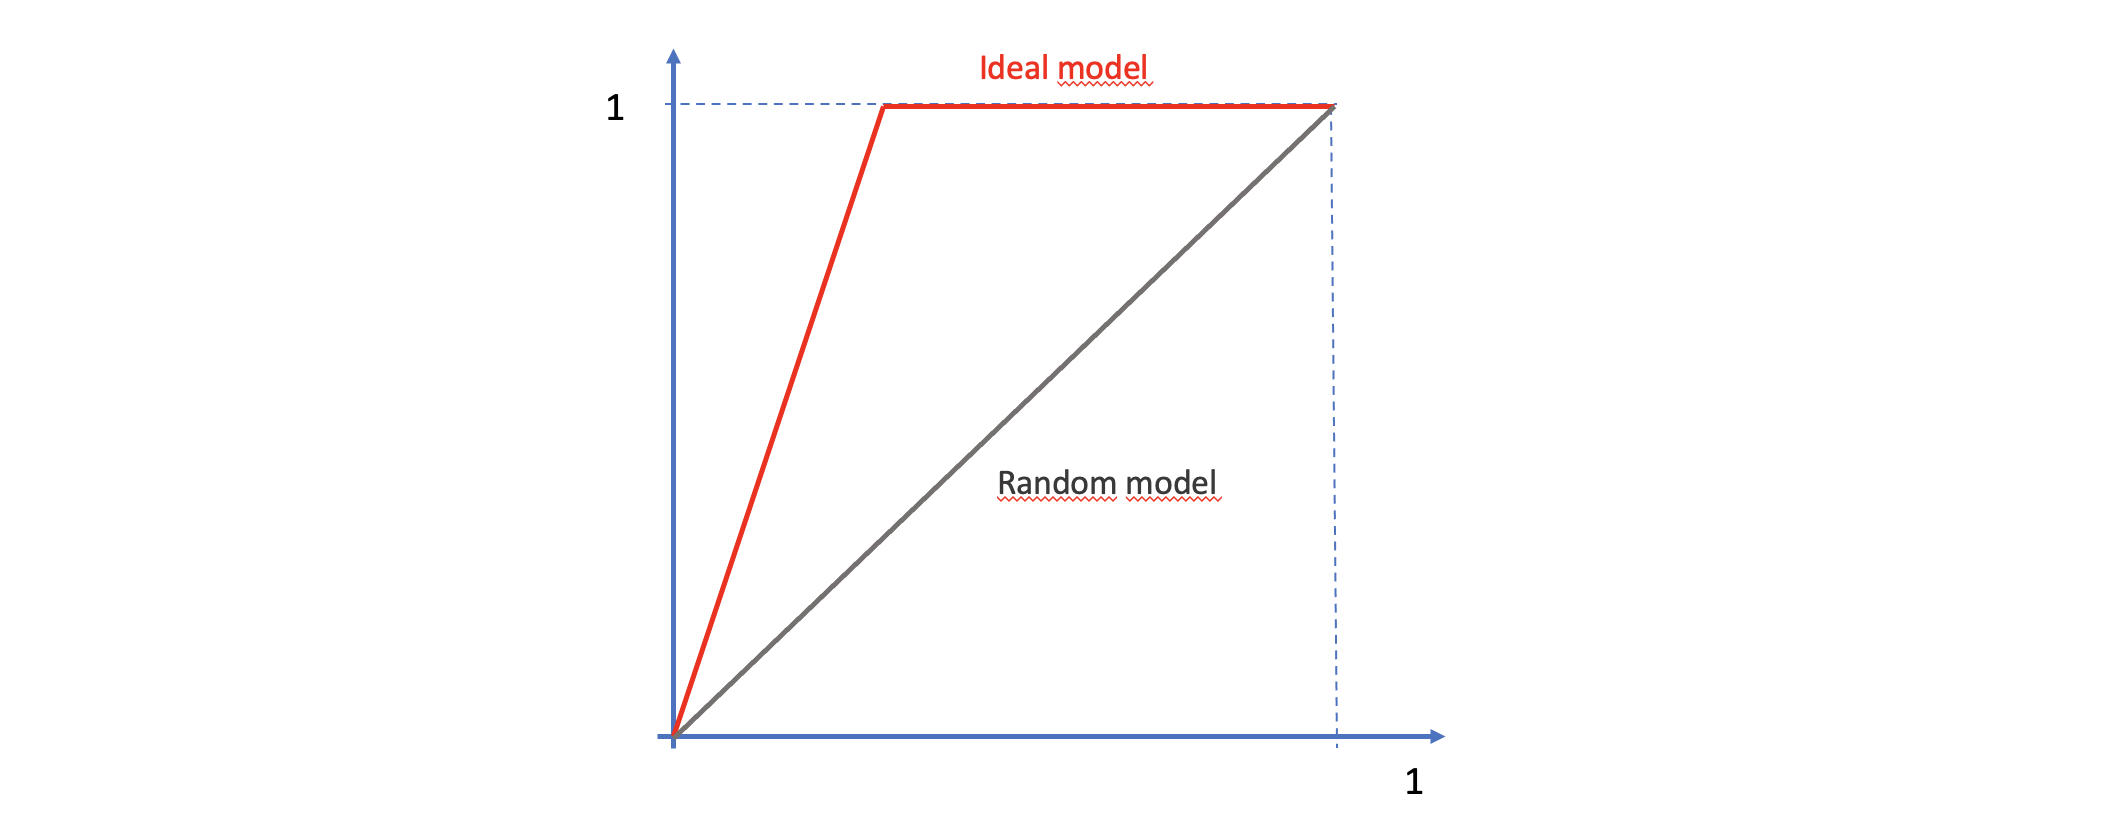

Can we use a similar logic to create approximants for these curves?

We can use a linear transformation on the original points for that. Notice that the matrix

$$\begin{bmatrix}
1 & \beta \\
0 & 1
\end{bmatrix}$$

leaves the $[1\;\; 0]^T$ $x$-basis vector fixed, but shifts the $y$-basis vector to the right. Then

$$\begin{bmatrix}
x'\\
y'
\end{bmatrix} = 
\begin{bmatrix}
1 & \beta \\
0 & 1
\end{bmatrix} \begin{bmatrix}
x\\
y
\end{bmatrix}$$

rotates the point as we wish, ie
$$\begin{align*}
x' &= x + \beta y\\
y'&= y
\end{align*}$$

where $y = [1 - (1-x)^\alpha]^{1/\alpha}$. Notice that setting $x=1$ yields $x' = 1 + \beta$, so to normalize this back to $[0,1]$ we divide by that value, for the final formula

$$\boxed{\begin{align*}
x'&= \displaystyle \frac{x + \beta y}{1+\beta}\\
y'&= y
\end{align*}}$$

In [18]:
alpha = 2
beta = 1

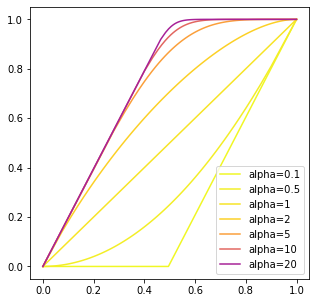

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
for alpha in [0.1, 0.5, 1, 2, 5, 10, 20]:
    y = (1-(1-x)**alpha)**(1/alpha)
    plt.plot((x + beta*y)/(1+beta), y, label=f"{alpha=}", color=cm.plasma(np.exp(-alpha/20)))
plt.legend()
plt.show()

We see that:
* $\alpha \in\; ]0, 1[$ means the curve is *worse than random*: it fills the lower half of the diamond
* $\alpha = 1$ is the *random guess* curve
* $\alpha > 1$ means the model is good; the higher the better.

## How to choose $\beta$?

$\beta$ is a fixed parameter, chosen from your model's imbalance.

We claim

$$\boxed{\beta = \frac{\mathbb P(Y=1)}{\mathbb P(Y=0)}}$$

Notice that this puts the "cut" at $x = \beta/(1+\beta)$.

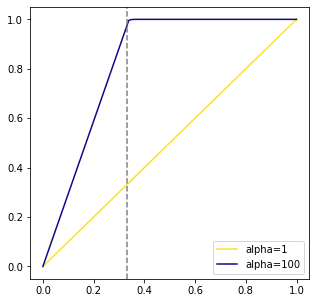

In [47]:
beta = 0.5

fig, ax = plt.subplots(figsize=(5,5))
for alpha in [1,100]:
    y = (1-(1-x)**alpha)**(1/alpha)
    plt.plot((x + beta*y)/(1+beta), y, label=f"{alpha=}", color=cm.plasma(np.exp(-alpha/20)))
plt.axvline(beta/(1+beta), color='gray', linestyle='--')
plt.legend()
plt.show()

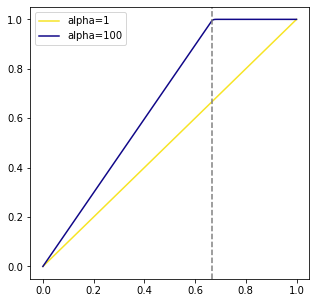

In [48]:
beta = 2

fig, ax = plt.subplots(figsize=(5,5))
for alpha in [1,100]:
    y = (1-(1-x)**alpha)**(1/alpha)
    plt.plot((x + beta*y)/(1+beta), y, label=f"{alpha=}", color=cm.plasma(np.exp(-alpha/20)))
plt.axvline(beta/(1+beta), color='gray', linestyle='--')
plt.legend()
plt.show()